# Ecuaciones Diferenciales con Transformada de Laplace

In [1]:
import numpy as np

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
from sympy import symbols, laplace_transform
mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'stix'

In [4]:
import sympy
sympy.init_printing()

In [5]:
from scipy import integrate

Ejemplo: Considere la siguirente ecuacuion con condiciones iniciales:
$$m\frac{d^2x}{dt^2}+kx=P_0\delta(t-t_o) $$
$$x(0)=0 , x'(0)=0 $$

In [162]:
t = sympy.symbols("t", positive=True) #Definimos cada una de las varaibles como terminos algebraicos haciendo que t sea un numero positivo

In [164]:
s, X = sympy.symbols("s X", complex=True) #hacemos que s & Y sean valores reales

In [170]:
x = sympy.Function("x") #Hacemos que "y" sea una función en terminos de las anteriores variables
m,k,P_o,t_o = sympy.symbols("m,k,P_o,t_o", real=True)
m=1
k=1
P_o=10

In [172]:
delta=sympy.DiracDelta(t-1)

In [174]:
ode =m*x(t).diff(t, 2) + k*x(t)- P_o*delta #Comando para ED

In [176]:
ode

In [178]:
L_x = sympy.laplace_transform(x(t), t, s) #Aplicamos su transformada de Laplace

In [179]:
L_x

In [181]:
#L_ode = sympy.laplace_transform(ode, t, s, noconds=True)
L_ode= sympy.laplace_transform(ode, t, s)

In [183]:
L_ode

### **Documentación**

Los codigos anteriores utilizan la función `sympy.laplace_transform` de **SymPy** para calcular la **transformada de Laplace**, pero operan sobre diferentes expresiones matemáticas.




### Código 1:
```python
L_y = sympy.laplace_transform(y(t), t, s)
```

#### Explicación:
- **Entrada**:
  - `y(t)`: Es una función simbólica dependiente de \( t \), como \( y(t) \).
  - `t`: La variable independiente del tiempo en \( y(t) \).
  - `s`: La variable del dominio de Laplace.

- **Salida**:
  - Calcula la transformada de Laplace de la función \( y(t) \), que está definida como:
    \[
    \mathcal{L}\{y(t)\}(s) = \int_0^\infty y(t) e^{-st} dt
    \]

- **Propósito**:
  - Este código se centra en obtener la transformada de Laplace de una **función específica**, como una entrada oda de un sistema.

---

### Código 2:
```python
L_ode = sympy.laplace_transform(ode, t, s)
```

#### Explicación:
- **Entrada**:
  - `ode`: Una ecuación diferencial simbólica en términos de \( y(t) \) y sus derivadas, como:
    \[
    \text{ode} = y''(t) + 2y'(t) + y(t) = f(t)
    \]
  - `t`: La variable independiente del tiempo.
  - `s`nde \( Y(s) \) es la transformada de \( y(t) \).

- **Propósito**:
  - Este código es útil para resolver **ecuaciones diferenciales** en el dominio de Laplace a_ode)
```
**Salida**:
Transforma cada término de la ecuación diferencial al dominio \( s \).


In [188]:
def laplace_transform_derivatives(e):
    """
    Evaluate the laplace transforms of derivatives of functions
    """
    if isinstance(e, sympy.LaplaceTransform):
        if isinstance(e.args[0], sympy.Derivative):
            d, t, s = e.args
            n = d.args[1][1]
            return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s) - 
                    sum([s**(n-i) * sympy.diff(d.args[0], t, i-1).subs(t, 0)
                         for i in range(1, n+1)]))
        
    if isinstance(e, (sympy.Add, sympy.Mul)):
        t = type(e)
        return t(*[laplace_transform_derivatives(arg) for arg in e.args])
    
    return e

### **Documentación**

La función anterior está diseñada para manejar y evaluar la  transformada de Laplacede derivadas simbólicas en expresiones dadas.



### Propósito:
La función aplica las propiedades de la transformada de Laplace a derivadas simbólicas dentro de una expresión. Recordemos que la transformada de Laplace de la \( n \)-ésima derivada de \( f(t) \) está dada por:

\[
\mathcal{L}\{f^{(n)}(t)\} = s^n \mathcal{L}\{f(t)\} - \sum_{k=0}^{n-1} s^{n-k-1} f^{(k)}(0)
\]

Donde \( f^{(k)}(0) \) son los valores iniciales de las derivadas hasta el orden \( n-1 \). La función implementa este resultado de forma simbólica.

---

### Análisis del código:

#### 1. **Manejo de transformadas de derivadas**:
```python
if isinstance(e, sympy.LaplaceTransform):
    if isinstance(e.args[0], sympy.Derivative):
        d, t, s = e.args
        n = d.args[1][1]
        return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s) - 
                sum([s**(n-i) * sympy.diff(d.args[0], t, i-1).subs(t, 0)
                     for i in range(1, n+1)]))
```

- **`sympy.LaplaceTransform`**:
  - Detecta si el término actual es una transformada de Laplace (`e` es una instancia de `sympy.LaplaceTransform`).
  
- **`sympy.Derivative`**:
  - Comprueba si el argumento dentro de la transformada (\( e.args[0] \)) es una derivada simbólica.
  
- **Transformada de la derivada**:
  - Si es una derivada \( f^{(n)}(t) \):
    - `n = d.args[1][1]`: Obtiene el orden \( n \) de la derivada.
    - Calcula:
      \[
      s^n \mathcal{L}\{f(t)\} - \sum_{i=1}^n s^{n-i} f^{(i-1)}(0)
      \]
      Usando:
      - `sympy.diff(d.args[0], t, i-1)`: Calcula la derivada simbólica de \( f(t) \).
      - `.subs(t, 0)`: Evalúa cada derivada inicial en \( t = 0 \).

#### 2. **Manejo de expresiones algebraicas**:
```python
if isinstance(e, (sympy.Add, sympy.Mul)):
    t = type(e)
    return t(*[laplace_transform_derivatives(arg) for arg in e.args])
```

- Si la expresión es una suma (`sympy.Add`) o un producto (`sympy.Mul`):
  - Aplica `laplace_transform_derivatives` recursivamente a cada término (\( e.args \)).
  - Reconstruye la expresión con la misma operación (suma o producto).

#### 3. **Otros casos**:
```python
return e
```

- Si el término no es una transformada de Laplace o esolver ecuaciones diferenciales en el dominio de Laplace aplicando propiedades de las derivadas.


In [194]:
L_ode

In [195]:
# Obtener la expresión de la transformada de Laplace (el primer elemento del resultado)
L_x_expr = L_x[0]  # El primer elemento de la tupla devuelta por LaplaceTransform

# Ahora sustituimos L_y_expr por Y en la ecuación
L_ode_3 = L_ode[0].subs(L_x_expr, X)

In [196]:
L_ode_3

In [197]:
ics = {x(0): 0, x(t).diff(t).subs(t, 0): 0} #COmando para agregar condiciiones iniciales

In [198]:
ics

In [199]:
L_ode_4 = L_ode_3.subs(ics) #Sustituye los valores iniciales en la ED L_ode_3

In [200]:
L_ode_4

In [201]:
X_sol = sympy.solve(L_ode_4,X)

In [202]:
X_sol #Muesta la solución a la ED, sin embargo cuando aparece un cuadrito significa que la ED no tiene solución por este metodo

In [205]:
x_sol = sympy.inverse_laplace_transform(X_sol[0], s, t)

In [208]:
x_sol

### **Documentación**

El código `sympy.simplify(y_sol).evalf()` realiza dos acciones principales sobre la expresión `y_sol`:

1. **`sympy.simplify(y_sol)`**:
   - Intenta simplificar la expresión simbólica `y_sol` para reducirla a una forma más compacta o más fácil de interpretar.  
   - Esto puede incluir combinar términos similares, factorizar, expandir, eliminar denominadores comunes, etc.  
   - **Ejemplo:**
     ```python
     from sympy import simplify, symbols
     x = symbols('x')
     expr = (x**2 + 2*x + 1) / (x + 1)
     print(simplify(expr))  # Resultado: x + 1
     ```

2. **`.evalf()`**:
   - Evalúa la expresión simbólica en forma numérica, es decir, aproxima los valores exactos a números decimales flotantes con cierta precisión.  
   - Se utiliza cuando necesitas resultados numéricos en lugar de valores simbólicos.  
   - **Ejemplo:**
     ```python
     from sympy import symbols, pi
     print(pi.evalf())  # Resultado: 3.1415to claridad como precisión numérica en los resultados.

In [214]:
x_t = sympy.lambdify(t, x_sol.evalf(), 'numpy')

In [216]:
x_t

<function _lambdifygenerated(t)>

### **Documentación**
La función `` y_t = sympy.lambdify(t, y_sol.evalf(), 'numpy') ``
Crea una función de Python que depende de la variable t.
Toma la expresión simbólica y la convierte en una función utilizable para cálculos numéricos.

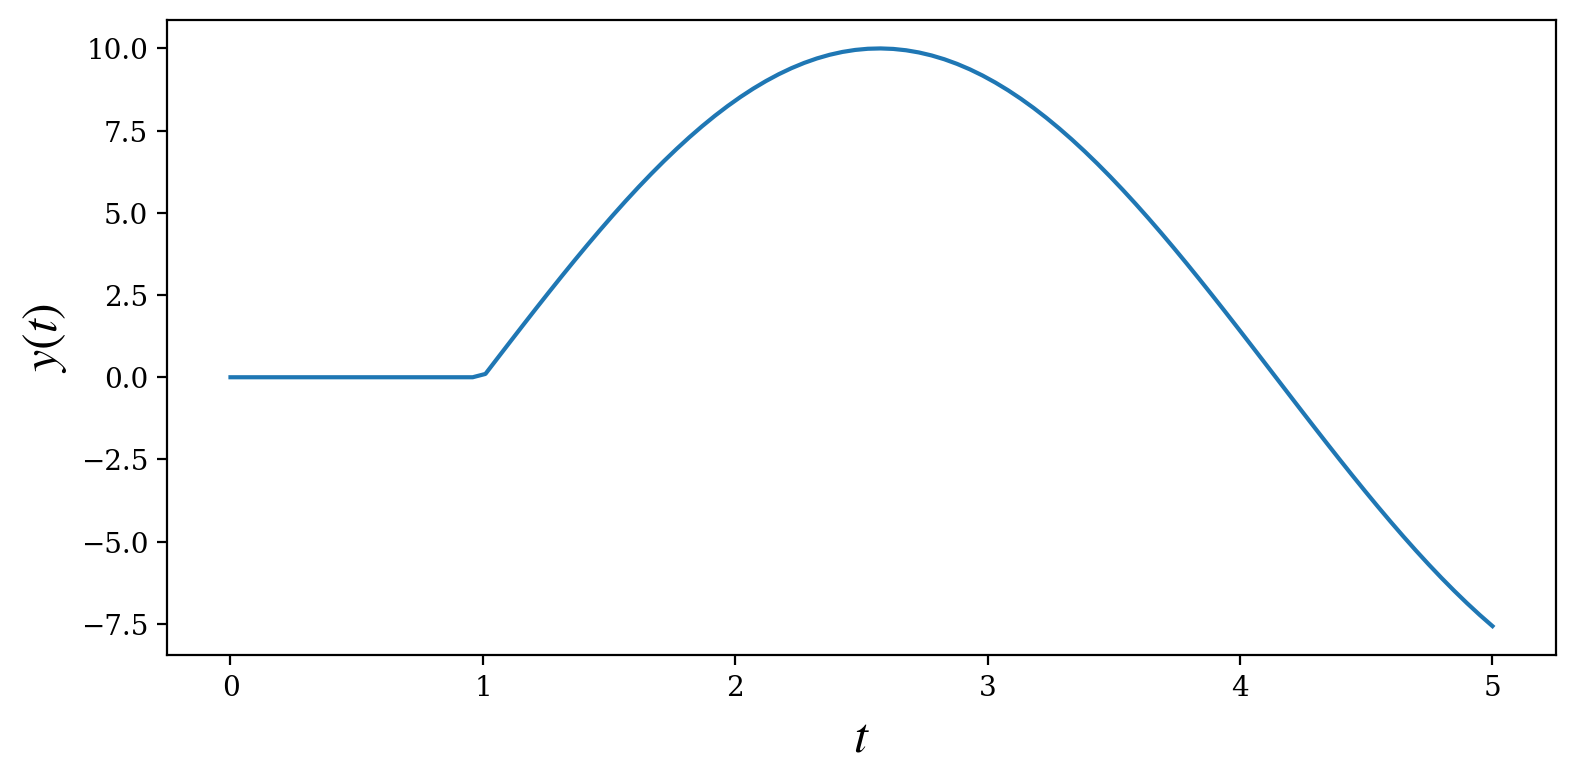

In [228]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc("text", usetex=False)  # Desactiva el uso de LaTeX

fig, ax = plt.subplots(figsize=(8, 4))
tt = np.linspace(0, 5, 100)
ax.plot(tt, x_t(tt).real)
ax.set_xlabel(r"$t$", fontsize=18)  # Todavía puedes usar texto matemático, pero sin LaTeX
ax.set_ylabel(r"$y(t)$", fontsize=18)
fig.tight_layout()
plt.show()
